# Assignment-1

## Hema Sai Ari

### Aim of the Analysis


False Alarms are being the main problem for the fire fighters.There were many situations where an fire alaram couldnt detect an actual fire and there were many more cases where an fire alaram goes on even if there is no smoke. So the aim of this analysis is to develop a AI based smoke Alarm which can be used along side with the traditional smoke alarm. So that it will reduce the number of false Alarms. We will fit different models to the data which were collected from different environmental conditions and decide on a single model and deploye it into the AI based smoke Alaram

### About the Data Set

This data set have around 16 attributes in which 15 are input variables and Fire Alarm is the target variable.The input varaibles are the data of various factors which are the main reasons for the fire/smoke. All these data were taken in different environmental conditions in which few are simulated.

### Importing the packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns



from sklearn.model_selection import train_test_split


# setting random seed to ensure that results are repeatable
np.random.seed(7026)


### Importing the Data Set

In [2]:
df=pd.read_csv('smoke_detection_iot.csv')

In [3]:
# Looking at the Data(overview of data)
df.head(10)

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.00,0.0,0.000,0.00,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.00,0.0,0.000,0.00,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.00,0.0,0.000,0.00,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.00,0.0,0.000,0.00,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.00,0.0,0.000,0.00,4,0
5,5,1654733336,20.073,54.12,0,400,12419,18998,939.725,0.0,0.00,0.0,0.000,0.00,5,0
6,6,1654733337,20.088,53.61,0,400,12432,19058,939.738,0.0,0.00,0.0,0.000,0.00,6,0
7,7,1654733338,20.103,53.20,0,400,12439,19114,939.758,0.0,0.00,0.0,0.000,0.00,7,0
8,8,1654733339,20.117,52.81,0,400,12448,19155,939.758,0.0,0.00,0.0,0.000,0.00,8,0
9,9,1654733340,20.132,52.46,0,400,12453,19195,939.756,0.9,3.78,0.0,4.369,2.78,9,0


Here we can observe that there are few useless attributes(columns) which doesnt effect our target variable. They are :
- Unnamed:0  : which is just the row numbers
- UTC        : Which is the Time Stamp
- CNT        : Sample Counter

So we can drop these columns and decrease our run time

### Dropping unnesasary columns/attributes

In [4]:
df=df.drop(columns=['Unnamed: 0','UTC','CNT'])

df.head(5)

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0
1,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,0
2,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,0
3,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,0
4,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,0


### Renamming the columns 

Lets rename the columns into a simplier way so that we can call them easily when needed

In [5]:
df.columns = [s.strip().replace(' ', '_') for s in df.columns]
# will replace the space between words in the column names with _

df.columns = [s.strip().replace('.', '_') for s in df.columns] 
# will replace the dots in few columns names with an _

df.columns=[s.strip().replace('Temperature[C]','Temperatur_C') for s in df.columns]
df.columns=[s.strip().replace('TVOC[ppb]','TVOC_ppd') for s in df.columns]
df.columns=[s.strip().replace('eCO2[ppm]','eCO2_ppm') for s in df.columns]
df.columns=[s.strip().replace('Pressure[hPa]','Pressure_hpa') for s in df.columns]
df.columns=[s.strip().replace('Humidity[%]','Humidity_percent') for s in df.columns]

df.columns

Index(['Temperatur_C', 'Humidity_percent', 'TVOC_ppd', 'eCO2_ppm', 'Raw_H2',
       'Raw_Ethanol', 'Pressure_hpa', 'PM1_0', 'PM2_5', 'NC0_5', 'NC1_0',
       'NC2_5', 'Fire_Alarm'],
      dtype='object')

### Data summary

In [6]:
df.describe()

,Temperatur_C,Humidity_percent,TVOC_ppd,eCO2_ppm,Raw_H2,Raw_Ethanol,Pressure_hpa,PM1_0,PM2_5,NC0_5,NC1_0,NC2_5,Fire_Alarm
count,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,0.714626
std,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,0.451596
min,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,0.000000
50%,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,1.000000
75%,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,1.000000
max,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,1.000000


### Lets check for missing values

Lets check for missing values by suming the total na's for each attribute

In [7]:
df.isna().sum()

Temperatur_C        0
Humidity_percent    0
TVOC_ppd            0
eCO2_ppm            0
Raw_H2              0
Raw_Ethanol         0
Pressure_hpa        0
PM1_0               0
PM2_5               0
NC0_5               0
NC1_0               0
NC2_5               0
Fire_Alarm          0
dtype: int64

Here we can clearlly observe that there are no missing values in the data set 

### Lets check for categorical variables

Lets find the categorical varibles by summing the total na's for each attribute

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Temperatur_C      62630 non-null  float64
 1   Humidity_percent  62630 non-null  float64
 2   TVOC_ppd          62630 non-null  int64  
 3   eCO2_ppm          62630 non-null  int64  
 4   Raw_H2            62630 non-null  int64  
 5   Raw_Ethanol       62630 non-null  int64  
 6   Pressure_hpa      62630 non-null  float64
 7   PM1_0             62630 non-null  float64
 8   PM2_5             62630 non-null  float64
 9   NC0_5             62630 non-null  float64
 10  NC1_0             62630 non-null  float64
 11  NC2_5             62630 non-null  float64
 12  Fire_Alarm        62630 non-null  int64  
dtypes: float64(8), int64(5)
memory usage: 6.2 MB


Here we can observe that there are no object data types which indicates that there are no categorical variables and also all the attriutes were numeric. So, we can conclude that there are no catergorical variables in this data set

### Checking the disturbution

Lets check the disturbution of main attributes in the data set

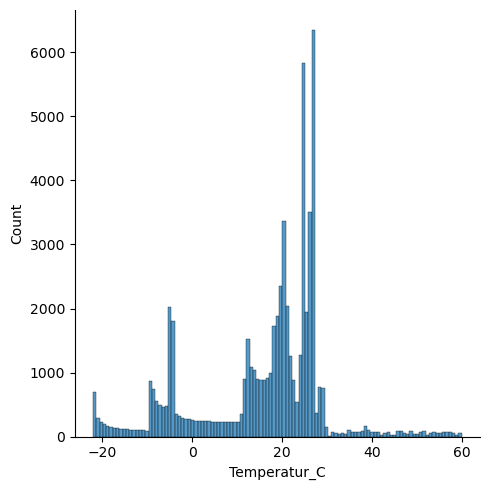

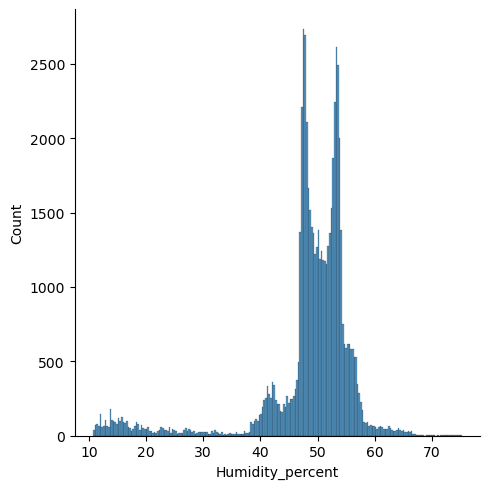

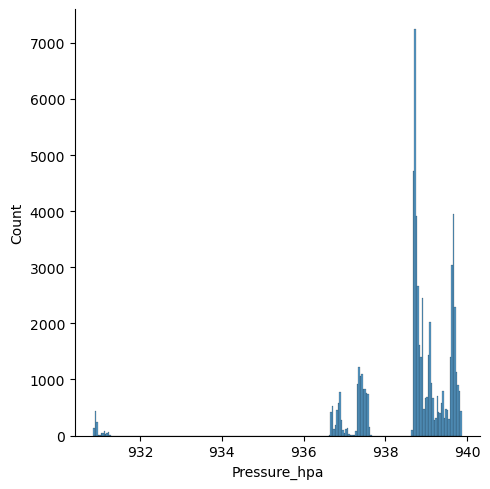

In [9]:
sns.displot(df['Temperatur_C'])
sns.displot(df.Humidity_percent)
sns.displot(df.Pressure_hpa)

We can observe that few variables are having the normal disturbution and the presssure_hpa is skwed towards the right.

### Checking the count of unique data in the target variable

In [10]:
df.Fire_Alarm.value_counts()

Fire_Alarm
1    44757
0    17873
Name: count, dtype: int64

We can clearlly see the data imbalance here

### Splitting the data set into train and test sets

Splitting the data into 70% training and 30% testing using the train test split

In [11]:
X_names = list(df.columns)
X_names.remove('Fire_Alarm') #Getting all the input variables
X = df[X_names]
y = df['Fire_Alarm']

train_df, test_df = train_test_split(df, test_size=0.3, random_state=1)

In [12]:
train_X = train_df.drop(columns=['Fire_Alarm'])
train_y = train_df.Fire_Alarm
test_X = test_df.drop(columns=['Fire_Alarm'])
test_y = test_df.Fire_Alarm

### Saving the train and test data sets as a csv files

In [13]:
train_df.to_csv('smoke_train_df.csv', index=False)
train_X.to_csv('smoke_train_X.csv', index=False)
train_y.to_csv('smoke_train_y.csv', index=False)
test_df.to_csv('smoke_test_df.csv', index=False)
test_X.to_csv('smoke_test_X.csv', index=False)
test_y.to_csv('smoke_test_y.csv', index=False)